In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# changing dataset for making a binary classification
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [14]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

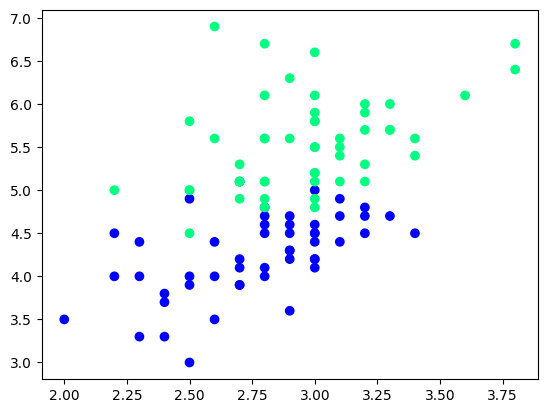

In [17]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')


In [18]:
df.shape

(100, 3)

In [42]:
df = df.sample(100)

# to train the algorithms
df_train = df.iloc[:60, :].sample(10)

# to calculate accuracy_score
df_val = df.iloc[60:80, :].sample(5)

# to predict values
df_test = df.iloc[80:, :].sample(5)

In [20]:
df_train

,sepal_width,petal_length,species
143,3.2,5.9,2
95,3.0,4.2,1
134,2.6,5.6,2
99,2.8,4.1,1
132,2.8,5.6,2
102,3.0,5.9,2
138,3.0,4.8,2
85,3.4,4.5,1
131,3.8,6.4,2
64,2.9,3.6,1


In [21]:
df_val

,sepal_width,petal_length,species
96,2.9,4.2,1
122,2.8,6.7,2
108,2.5,5.8,2
77,3.0,5.0,1
88,3.0,4.1,1


In [22]:
df_test

,sepal_width,petal_length,species
84,3.0,4.5,1
97,2.9,4.3,1
126,2.8,4.8,2
121,2.8,4.9,2
149,3.0,5.1,2


In [28]:
# Extracting X_test and y_test
X_test = df_val.iloc[:, :-1].values
y_test = df_val.iloc[:, -1].values

In [29]:
X_test

array([[2.9, 4.2],
       [2.8, 6.7],
       [2.5, 5.8],
       [3. , 5. ],
       [3. , 4.1]])

In [30]:
y_test

array([1, 2, 2, 1, 1])

# **Bootstrap Sampling**

In [32]:
# data for tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_width,petal_length,species
132,2.8,5.6,2
134,2.6,5.6,2
102,3.0,5.9,2
138,3.0,4.8,2
132,2.8,5.6,2
64,2.9,3.6,1
85,3.4,4.5,1
95,3.0,4.2,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [34]:
dt_bag1 = DecisionTreeClassifier()

In [35]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

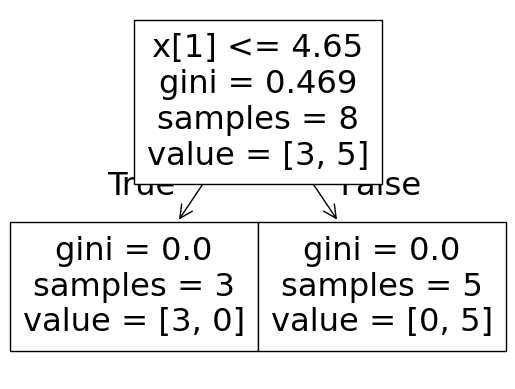

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


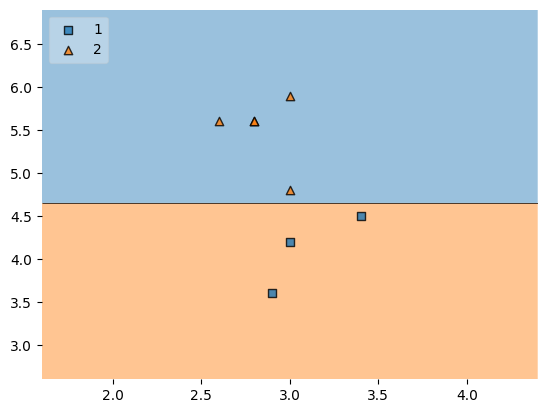

In [36]:
evaluate(dt_bag1, X, y)

In [37]:
# data for tree 2
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_width,petal_length,species
132,2.8,5.6,2
95,3.0,4.2,1
143,3.2,5.9,2
132,2.8,5.6,2
85,3.4,4.5,1
102,3.0,5.9,2
99,2.8,4.1,1
134,2.6,5.6,2


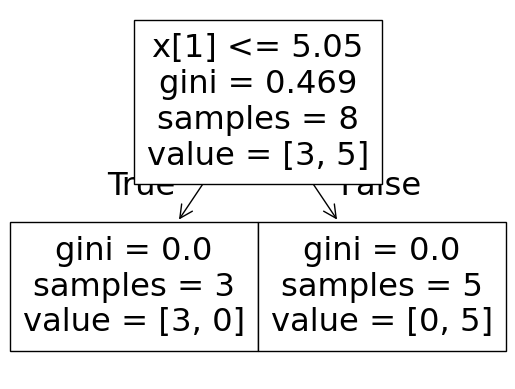

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


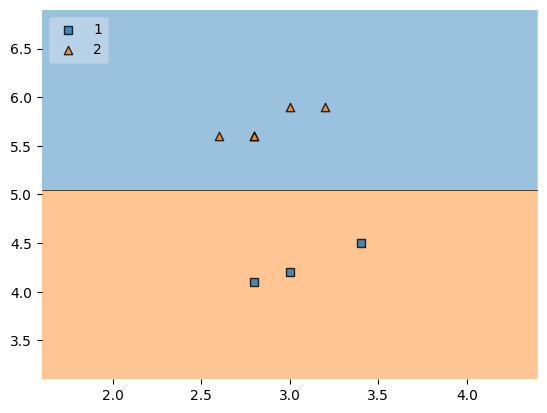

In [38]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [39]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
132,2.8,5.6,2
134,2.6,5.6,2
143,3.2,5.9,2
138,3.0,4.8,2
143,3.2,5.9,2
134,2.6,5.6,2
95,3.0,4.2,1
64,2.9,3.6,1


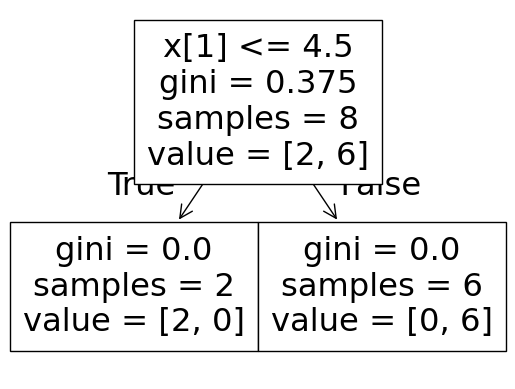

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


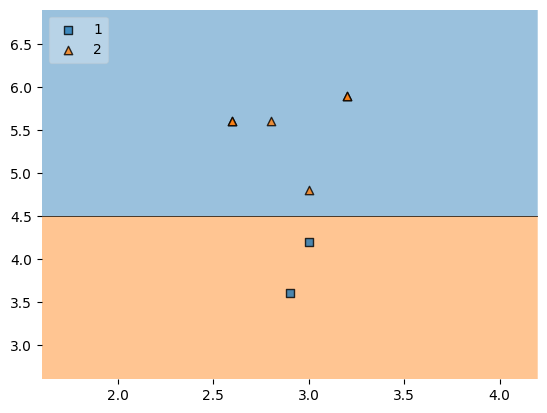

In [40]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# **Aggregation(Prediction)**

In [41]:
df_test

,sepal_width,petal_length,species
84,3.0,4.5,1
97,2.9,4.3,1
126,2.8,4.8,2
121,2.8,4.9,2
149,3.0,5.1,2


In [47]:
print("Predictor 1",dt_bag1.predict(np.array([2.8, 4.8]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8, 4.8]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8, 4.8]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Pasting**





```
Row sampling as done in bagging but without replacement
```



In [48]:
df_train

,sepal_width,petal_length,species
104,3.0,5.8,2
64,2.9,3.6,1
118,2.6,6.9,2
103,2.9,5.6,2
131,3.8,6.4,2
59,2.7,3.9,1
62,2.2,4.0,1
125,3.2,6.0,2
110,3.2,5.1,2
111,2.7,5.3,2


In [50]:
df_train.sample(8)  # replace=False by default

,sepal_width,petal_length,species
103,2.9,5.6,2
131,3.8,6.4,2
64,2.9,3.6,1
110,3.2,5.1,2
111,2.7,5.3,2
118,2.6,6.9,2
62,2.2,4.0,1
125,3.2,6.0,2


# **Random Subspaces**



```
column sampling with replacement
```



In [51]:
df1 = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [52]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
# a different combination of columns everytime
df1.sample(2, replace=True, axis=1)

# Columns may repeat as well as replace=True

,species,petal_width
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2
...,...,...
145,virginica,2.3
146,virginica,1.9
147,virginica,2.0
148,virginica,2.3


# **Random Patches**



```
Row sampling as well as column sampling
```



In [58]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
# chaining row and column sampling
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,sepal_length,sepal_width
71,6.1,2.8
0,5.1,3.5
85,6.0,3.4
21,5.1,3.7
77,6.7,3.0
85,6.0,3.4
83,6.0,2.7
136,6.3,3.4
